# Title - Show Me the Money Ball. Come with KBO

# Introduction

&nbsp;&nbsp;한국야구에서 외국인 투수의 역량은 팀의 성적에 큰 영향을 미친다. 대부분 팀에서 1,2 선발을 외인투수로 채우려는 경향이 있다보니, 이들의 성적에 따라 해당 시즌 팀의 성적이 크게 좌우된다. 어떤 외국인 투수를 영입해 오는 것이 좋을 지에 대한 고민은 구단 스카우터들의 고민거리 중 하나이다.   
&nbsp;&nbsp;2018.09.11 KBO 제5회 이사회에서 향후 신규 외국인 선수 계약 시 연봉과 계약금, 그리고 이적료와 옵션을 모두 포함해 총 100만 달러(한화 약 11억 2,850만 원)로 제한되었고, 위반 시 외국인 선수 계약 규정 위반 시엔 해당 계약을 무효로 하고, 선수에겐 참가 활동정지 1년 처분 및 구단에도 다음 연도 신인 1차 지명권 박탈과 제재금 10억 원을 부과하게 되었다.([2018년 KBO 제5차 이사회 결과](https://www.koreabaseball.com/News/Notice/View.aspx?bdSe=7159)) 그렇기 때문에 메이저리그에서 성적이 우수한 선수를 비싼 연봉을 주고 데려오지 못하게된 어려움이 있다.   
&nbsp;&nbsp;위와 같은 사항 때문에 외국인 투수를 영입하는데 중요한 요건 중 첫번째는 **가성비**이다. 100만달러 이하의 연봉과 계약금으로 KBO에서 좋은 성적을 낼 수 있는 선수를 영입해야한다. 두번째는 KBO에 들어온 후 첫 시즌을 무사히 끝내고 계속해서 계약할 수 있는지에 대한 **생존 가능성**이다. 위에서 언급한 새로운 외국인 선수 영입에 대한 규정에서 다년 계약은 입단 2년차부터 가능하기 때문에 구단의 입장에서는 계속해서 KBO에 있을 수 있는 선수가 필요하다.   
&nbsp;&nbsp;이 과제에서는 2011~2018년까지 KBO에서 활동한 외국인 투수들의 성적을 통해 2019년에 새롭게 영입해야할 외국인 투수 중 **가성비**와 **생존 가능성**을 고려하여 팀에 도움이 될 수 있는 2명의 선수를 선택한다.

# Materials 

① pitcher_df.csv  
2011년부터 2018년까지 KBO에서 활약한 외국인 투수들의 역대 KBO 정규시즌 성적 
- 출처: http://www.statiz.co.kr/main.php 
- 기존에 제공된 자료에 결측값(나이)과 추가 변수(승, 패, 이닝, 연봉 등)를 목적으로 수집

② fangraphs_foreigners_2011_2018.csv  
2011년부터 2018년까지 KBO에서 활약한 외국인 투수들의 KBO 입성 전, 메이저리그에서의 역대 정규시즌 성적

③ baseball_savant_foreigners_2011_2018.csv  
2011년부터 2018년까지 KBO에서 활약한 외국인 투수들의 KBO입성 전, 메이저리그에서의 스탯캐스트 데이터

④ new_pitcher_19.csv  
2019년 신규 외국인 투수들의 현재 나이
- 출처: http://www.statiz.co.kr/main.php

⑤ fangraphs_foreigners_2019.csv   
2019년 신규 외국인 투수들의 메이저리그에서의 역대 정규시즌 성적

⑥ baseball_savant_foreigners_2019.csv  
2019년 신규 외국인 투수들의 메이저리그에서의 스탯캐스트 데이터

# Methods

- 데이터에 분석은 2011~2018년 데이터를 통해 재계약에 성공한 선수를 나누고 그 중 좋은 성적을 나타내는 기준으로 첫 시즌 10승 달성 투수 (**A Class**) 를 정한다. A Class의 특징을 추출하여 2019년 새로 뽑힌 13명의 외국인 투수들 중 비슷한 특징을 나타내는 선수를 찾는다.
- 분석 순서는 2011~2018년 KBO 외국인 투수의 성적을 기준으로하여 KBO에서 A Class의 실제 성적이 더 좋은지를 확인하고 두 그룹 (A Class와 B class) 의 KBO 입단 전 2011~2018 MLB에서의 성적을 비교한다. MLB에서의 A class의 특징을 찾고 2019년 새롭게 영입할 외국인 투수들의 MLB에서 성적이 A class와 비슷한 선수 2명을 결정한다.

- Library

In [1]:
import numpy as np 
import pandas as pd
import os

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
import plotly
plotly.offline.init_notebook_mode()

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
kbo_1118 = pd.read_csv('../dataset/kbo_yearly_foreigners_2011_2018.csv')
mlb_1118 = pd.read_csv('../dataset/fangraphs_foreigners_2011_2018.csv')
mlb_stat_1118 = pd.read_csv('../dataset/baseball_savant_foreigners_2011_2018.csv')
mlb_19_age = pd.read_csv('../dataset/new_pitcher_19.csv', encoding='cp949')
mlb_19 = pd.read_csv('../dataset/fangraphs_foreigners_2019.csv')
mlb_stat_19 = pd.read_csv('../dataset/baseball_savant_foreigners_2019.csv')

In [3]:
# 2011~2018년 KBO에서 활동한 외국인 투수의 제공된 자료에 결측값(나이)과 추가 변수(승, 패, 이닝, 연봉 등)를 목적으로 수집한 테이블
pitcher_salary = pd.read_csv('../dataset/pitcher_salary.csv', encoding='cp949')
pitcher_df = pd.read_csv('../dataset/pitcher_df.csv', encoding='cp949')
# 피어밴드의 경우 2016년 전반기에는 넥센 후반기에는 KT에 있었기때문에 통산 자료는 제외한다.
pitcher_df.연도 = pitcher_df.연도.fillna(2016)
pitcher_df = pitcher_df.drop(pitcher_df[pitcher_df.팀=='넥센,kt'].index, axis=0)
pitcher_df.연도 = pitcher_df.연도.astype(int)

2011~2018 선수 데이터에 짝이 맞지않는 선수가 있다. 총 62명의 선수 중 57명이 KBO와 MLB 데이터에 모두 있다. 그러므로 57명의 선수 데이터만 사용한다.

In [4]:
set_kbo = set(kbo_1118.pitcher_name.unique())
set_mlb1 = set(mlb_1118.pitcher_name.unique())
set_mlb2 = set(mlb_stat_1118.pitcher_name.unique())
pitcher = set_kbo & set_mlb1 & set_mlb2
print('KBO 데이터에는 있지만 MLB에는 기록이 없는 선수: ',(set_kbo - set_mlb1) | (set_kbo - set_mlb2))
print('MLB 데이터에는 있지만 KBO에는 기록이 없는 선수: ',(set_mlb1 - set_kbo) | (set_mlb2 - set_kbo))
pitcher_df = pitcher_df[pitcher_df.이름.isin(pitcher)]
mlb_1118 = mlb_1118[mlb_1118.pitcher_name.isin(pitcher)]
mlb_stat_1118 = mlb_stat_1118[mlb_stat_1118.pitcher_name.isin(pitcher)]

KBO 데이터에는 있지만 MLB에는 기록이 없는 선수:  {'마리몬', '브리검', '밴덴헐크', '리즈', '카스티요'}
MLB 데이터에는 있지만 KBO에는 기록이 없는 선수:  {'벨레스터'}


# Results

## 2011~2018 외국인 선수 중 A Class 특징

In [5]:
print('2011~2018년 외국인 투수는 총 {}명 이다.'.format(pitcher_df.이름.nunique()))

2011~2018년 외국인 투수는 총 57명 이다.


In [6]:
# 선수의 첫 kbo 계약시 연봉과 stat을 한 테이블로 join 한다.
starting_salary = pd.merge(pitcher_salary.groupby('이름')['연도'].min().reset_index(), pitcher_salary, on=['이름','연도'], how='inner')
starting_stat = pd.merge(starting_salary[['이름','연도','연봉(만원)']], pitcher_df, on=['이름','연도'], how='inner')
starting_stat = starting_stat.drop('팀', axis=1)

# 각 선수별 제계약 여부를 renew라는 변수로 생성하여 join한다.
renew_pitcher = pitcher_df.groupby('이름')['연도'].count().reset_index()
renew_pitcher.loc[:,'renew'] = 1
renew_pitcher.loc[renew_pitcher.연도 == 1, 'renew'] = 0
starting_stat = pd.merge(starting_stat, renew_pitcher.drop('연도',axis=1), on='이름', how='inner')

# 10승 여부를 나타내는 win10 변수를 만들어 준다
starting_stat.loc[:,'win10'] = 1
starting_stat.loc[starting_stat.승 < 10, 'win10'] = 0

# 재계약과 10승 모두 한 선수를 나타내는 renew_10 변수를 만든다.
starting_stat.loc[:,'renew_10'] = 1
starting_stat.loc[(starting_stat.renew!=1)|(starting_stat.win10!=1),'renew_10'] = 0

- A class 선수가 9명(16%) 이였고, B class 선수는 48명(84%) 였다.

In [7]:
# x label 변경
starting_stat.renew_10 = starting_stat.renew_10.map({0:'B class',1:'A class'})
# renew_10 변수에 대해 count한다.
renew_10_cnt = starting_stat.renew_10.value_counts()
renew_10_rate = starting_stat.renew_10.value_counts(normalize=True)
# barplot
trace1 = go.Bar(
    x=renew_10_cnt.index,
    y=renew_10_cnt.values
)
trace2 = go.Bar(
    x=renew_10_rate.index,
    y=renew_10_rate.values
)

fig = tools.make_subplots(rows=1, cols=2)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=300, width=900, title='A class 선수의 빈도 수와 비율')
plotly.offline.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



- WAR를 기준으로 보았을때 어떤 특징이 보일까?
    - WAR를 기준으로 잘하는 선수인지를 정하고 오름차순으르 정렬하였다.
        - WAR는 (Wins Above Replacement)의 약어로 대체 수준 대비 승리 기여를 의미한다.
        - WAR의 의미는 WAR가 1인 선수를 썼을때 88승이였다면 그 선수 대신 WAR가 3인 선수를 썼다면 90승을 했다는 의미로 사용된다
    - WAR가 높을 수록 *'이닝','출장','삼진','선발','타자'* 는 WAR가 낮은 선수에 비해 더 많은 값을 가졌고, WAR가 낮을 수록 *'ERA,'FIP','WHIP','실점','자책','안타','홈런','볼넷'* 은 더 낮은 값을 가졌다. 
    - 연봉은 WAR가 높은 선수일수록 더 많은 연봉을 받는 편지였지만 제 값을 하지 못하는 선수도 있었다.

- 잘하는 선수는 과연 재계약을 맺을까?
    - 히트맵을 기준으로 재계약을 한 수들은 대체로 WAR가 모두 높은 수준이였고 ERA 또한 낮았다. 

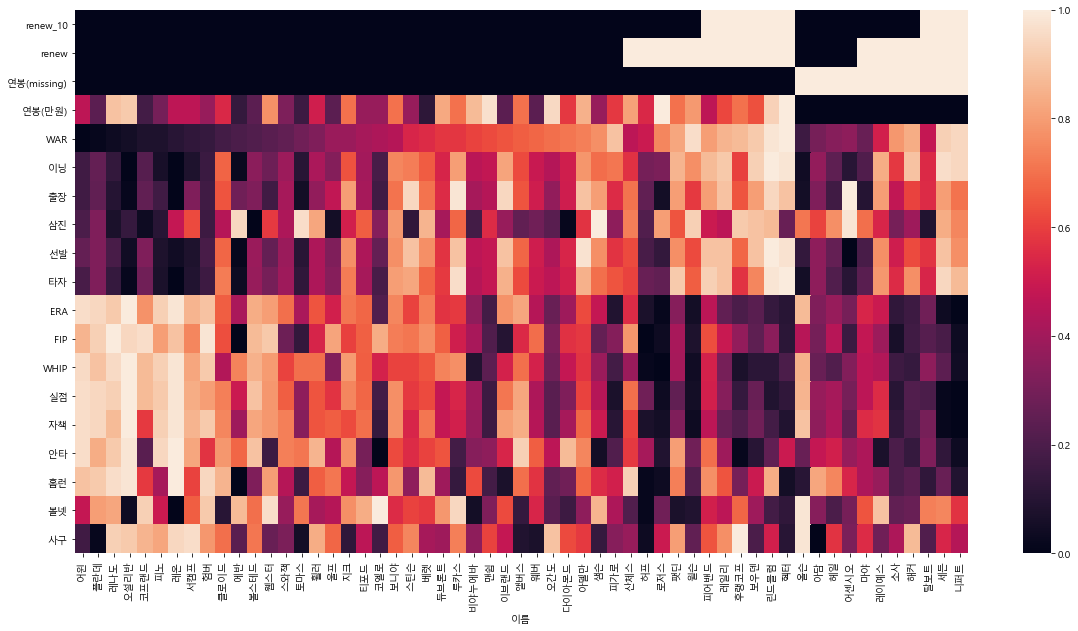

In [8]:
# renew_10 level 변경
starting_stat.renew_10 = starting_stat.renew_10.map({'B class':0,'A class':1})
# 연봉이 결측값인 선수와 아닌 선수를 구분한다.
starting_stat['연봉(missing)'] = 0
starting_stat.loc[starting_stat['연봉(만원)'].isnull(), '연봉(missing)'] = 1
# 연봉 결측값은 따로 중앙값이나 평균을 넣기보다 0으로 대채하여 heatmap을 생성하는데 지장이 없도록한다.
starting_stat['연봉(만원)'] = starting_stat['연봉(만원)'].fillna(0)
starting_stat['연봉(만원)'] = starting_stat['연봉(만원)'].apply(lambda x: str(x).replace(',','')).astype(int)
starting_stat = starting_stat.set_index('이름')

# features 순서
pos_features = ['renew_10','renew','연봉(missing)','연봉(만원)','WAR', '이닝', '출장', '삼진', '선발','타자']
neg_features = ['ERA', 'FIP', 'WHIP', '실점', '자책',  '안타', '홈런', '볼넷', '사구']

# '삼진','실점','자책','안타','홈런','볼넷','사구','폭투','고4' 의 경우 타자대비 성적으로 나타내야한다.
per_stat = ['삼진','실점','자책','안타','홈런','볼넷','사구']
starting_stat[per_stat] = starting_stat[per_stat + ['타자']].apply(lambda x: x / x.타자, axis=1).iloc[:,:-1] 

# 변수간의 차이를 최소화하여 heatmap을 볼 수 있도록 rank를 매긴 후 minmax scaling하여 모든 변수의 분포를 uniform하게 만든다.
# rank scaling 
starting_stat_scale = starting_stat.copy()
starting_stat_scale[pos_features + neg_features] = starting_stat_scale[pos_features + neg_features].rank(ascending=1)

# minmax scaling 
encoding = MinMaxScaler()
starting_stat_scale.loc[:,pos_features + neg_features] = encoding.fit_transform(starting_stat_scale.loc[:,pos_features + neg_features])
# heatmap positive features
plt.figure(figsize=(20,10))
sns.heatmap(starting_stat_scale[pos_features + neg_features].sort_values(by=['연봉(missing)','renew','renew_10','WAR']).T)
plt.show()

데이터 출처: http://www.statiz.co.kr/main.php

### A class 선수들의 KBO 성적
- B class보다 나이가 더 어린편에 속한다. 모두 30세 이하이다.
- B class보다 더 많은 출장을 나왔고, 더 많은 이닝을 던지고, 더 많은 타자를 상대했다.
- 실점, 자책, 안타, 홈런, ERA, FIP, WHIP 모두 B class보다 더 작은 값을 가진다.
- B class보다 더 많은 삼진을 잡았고, WAR 수치가 더 높다.

In [9]:
starting_stat.renew_10 = starting_stat.renew_10.map({0:'B class', 1:'A class'})

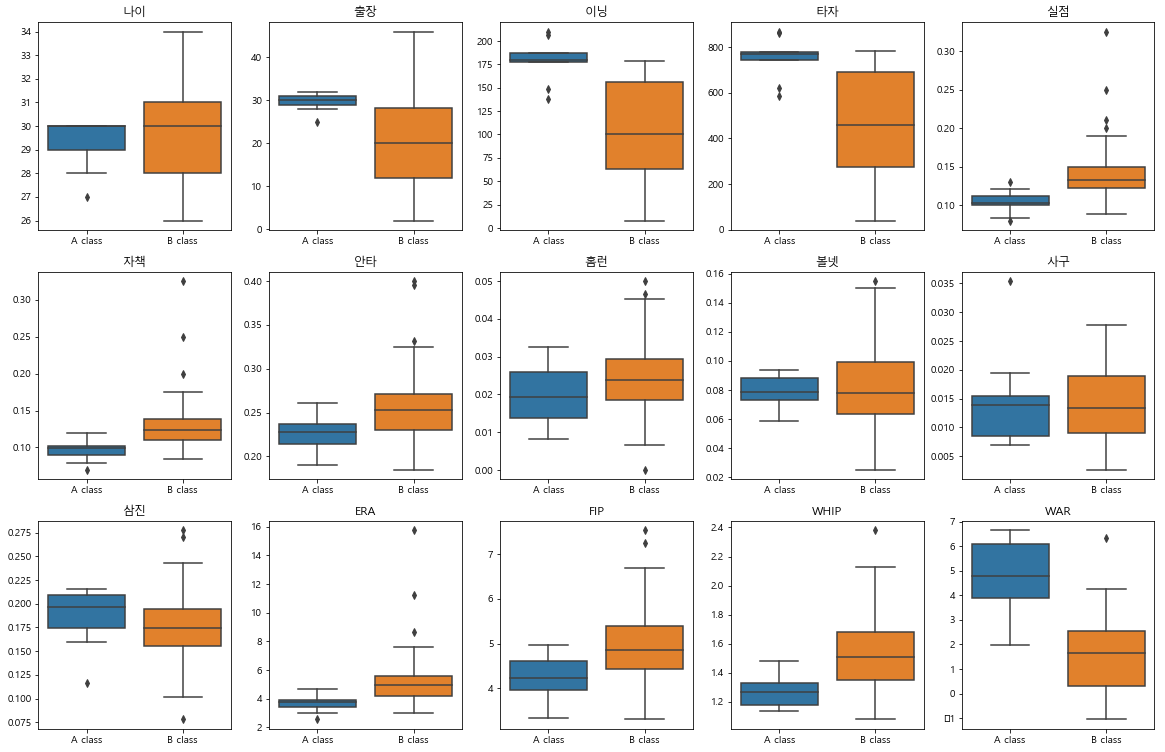

In [10]:
features = ['나이','출장','이닝','타자','실점','자책','안타','홈런','볼넷','사구','삼진','ERA','FIP','WHIP','WAR']
f, ax = plt.subplots(3,5, figsize=(20,13))
for i in range(len(features)):
    sns.boxplot(x='renew_10', y=features[i], data=starting_stat, ax=ax[i//5, i%5])
    ax[i//5, i%5].set_title(features[i])
    ax[i//5, i%5].set_xlabel("")
    ax[i//5, i%5].set_ylabel("")

데이터 출처: http://www.statiz.co.kr/main.php

## 두 그룹의 MLB 성적 비교

In [11]:
starting_stat = starting_stat.reset_index()
starting_stat = starting_stat.rename(columns={'이름':'pitcher_name'})
# 재계약 여부에 따른 성적을 보기위해 table을 join 한다
mlb_1118 = pd.merge(mlb_1118, starting_stat[['pitcher_name','renew','renew_10']], on='pitcher_name', how='left')
mlb_stat_1118 = pd.merge(mlb_stat_1118, starting_stat[['pitcher_name','renew','renew_10']], on='pitcher_name', how='left')

### 구종 (pitch_name)

In [12]:
# 포심과 투심 패스트볼은 모두 하나의 패스트볼로 통일한다. 
mlb_stat_1118.pitch_name = mlb_stat_1118.pitch_name.apply(lambda x: 'Fastball' if x in ['4-Seam Fastball', '2-Seam Fastball'] else x )
# nan 값은 Unknown으로 변경한다. 
mlb_stat_1118.pitch_name = mlb_stat_1118.pitch_name.apply(lambda x: 'Unknown' if str(x) == 'nan' else x )

# 선수별 구종 개수 변수(pitch_cnt)를 생성한다.
pitcher_info = starting_stat[['pitcher_name','renew_10']].copy()
pitcher_info.loc[:,'pitch_cnt'] = 0

# 선수별 구종을 pitcher_info의 변수로 추가한다.
for pitch in mlb_stat_1118.pitch_name.unique():
    if pitch in ['Unknown','Pitch Out','Eephus','Intentional Ball']:
        continue
    pitcher_info.loc[:,pitch] = 0

# 선수마다 구사하는 구종 개수를 입력한다.
for pitcher in pitcher_info.pitcher_name.unique():
    pitch_names = list(mlb_stat_1118[mlb_stat_1118.pitcher_name==pitcher].pitch_name.unique())
    if 'Unknown' in pitch_names:
        pitch_names.remove('Unknown')
    if 'Pitch Out' in pitch_names:
        # Pitch Out은 구종이라기보다 고의로 볼을 내는 것이기때문에 제외한다.
        pitch_names.remove('Pitch Out')
    if 'Eephus' in pitch_names:
        # Eephus는 구종 중 하나이긴 하지만 흔치않은 구종이고 사실상 전략에 중요한 요소는 아니기 때문에 제외한다.
        pitch_names.remove('Eephus')
    if 'Intentional Ball' in pitch_names:
        # Intentional Ball은 고의 4구이기 때문에 제외한다.
        pitch_names.remove('Intentional Ball')
    
    pitcher_info.loc[pitcher_info.pitcher_name==pitcher, 'pitch_cnt'] = len(pitch_names)
    
#  각 선수가 사용하는 구종을 pitcher_info에 count한다.
    for pitch_name in pitch_names:
        pitcher_info.loc[pitcher_info.pitcher_name==pitcher, pitch_name] = 1

# '리즈'와 '카스티요'는 MLB 테이블에 정보가 없기때문에 선수명단에서 제외한다.
drop_index = pitcher_info[pitcher_info.pitcher_name.isin(['리즈','카스티요'])].index
pitcher_info = pitcher_info.drop(drop_index, axis=0)

#### class 별 구종 수
- A class의 선수들은 대부분 5개의 구종을 구사한다.

In [13]:
# renew와 pitch_cnt에 따른 pitcher 수를 count 한다.
temp = pitcher_info.groupby(['renew_10','pitch_cnt']).count().reset_index()

# 비율로 비교하기위해 renew_10 별 투수 수로 나누어준다.
cnt_by_renew_10 = pitcher_info.groupby('renew_10').count()['pitcher_name']
temp.loc[temp.renew_10=='B class','pitcher_name'] = temp.loc[temp.renew_10=='B class','pitcher_name'] / cnt_by_renew_10.loc['B class']
temp.loc[temp.renew_10=='A class','pitcher_name'] = temp.loc[temp.renew_10=='A class','pitcher_name'] / cnt_by_renew_10.loc['A class']

# barplot
trace1 = go.Bar(
    x=temp[temp.renew_10=='A class'].pitch_cnt,
    y=temp[temp.renew_10=='A class'].pitcher_name,
    name='A class'
)
trace2 = go.Bar(
    x=temp[temp.renew_10=='B class'].pitch_cnt,
    y=temp[temp.renew_10=='B class'].pitcher_name,
    name='B class'
)
data = [trace1, trace2]
layout = go.Layout(barmode='group', title='A class 선수 여부에 따른 구종 수')
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

#### class별 구종 별 빈도 수
- A class의 선수는 Slider와 Sinker를 더 많은 비중으로 사용한다.

In [14]:
temp = pitcher_info.groupby(['renew_10']).sum().reset_index()
cnt_by_renew_10 = pitcher_info.groupby(['renew_10'])['pitcher_name'].count()

# 재계약 여부에 따른 선수 수로 나누어 비율로 비교한다.
pitch_names = ['Fastball', 'Changeup', 'Curveball', 'Cutter','Slider', 'Forkball', 'Sinker', 'Split Finger']
temp.loc[temp.renew_10=='B class',pitch_names] = temp.loc[temp.renew_10=='B class',pitch_names] / cnt_by_renew_10.loc['B class']
temp.loc[temp.renew_10=='A class',pitch_names] = temp.loc[temp.renew_10=='A class',pitch_names] / cnt_by_renew_10.loc['A class']

# barplot
trace1 = go.Bar(
    x=pitch_names,
    y=np.array(temp.loc[temp.renew_10=='A class',pitch_names])[0],
    name='A class'
)
trace2 = go.Bar(
    x=pitch_names,
    y=np.array(temp.loc[temp.renew_10=='B class',pitch_names])[0],
    name='B class'
)
data = [trace1, trace2]
layout = go.Layout(barmode='group', title='class에 따른 구종 별 빈도 수')
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

### 구종 별 구속 (release_speed)
- A class의 선수는 B class 선수에 비해 Fastball, Changeup, Cutter, Slider가 구속이 더 빠른편이다.
- 반면에 Curveball 이나 Sinker의 경우 더 구속이 느린편이다.

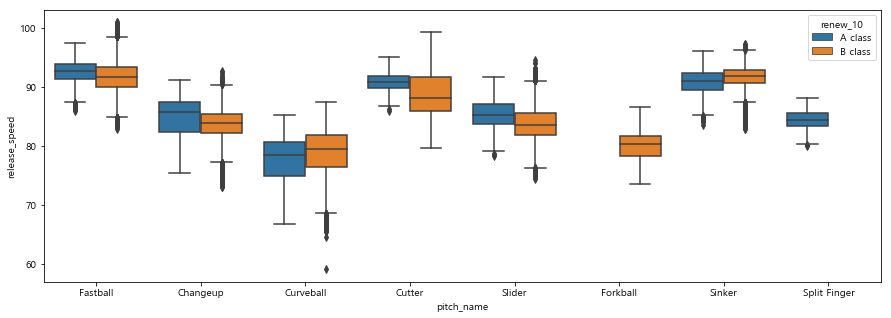

In [15]:
pitch_names = ['Fastball', 'Changeup', 'Curveball', 'Cutter', 'Slider', 'Forkball', 'Sinker', 'Split Finger']
temp = mlb_stat_1118[(mlb_stat_1118.release_speed.isnull()==False)&(mlb_stat_1118.pitch_name.isin(pitch_names))]
plt.figure(figsize=(15,5))
sns.boxplot(x='pitch_name', y='release_speed', hue='renew_10', data=temp)
plt.show()

In [16]:
# 이후 2019년 신규 외국인 선수들의 성적과 비교할때 사용
a_class_speed = temp[temp.renew_10=='A class'].groupby('pitch_name').median()['release_speed'].reset_index()

### 구종 별 공의 회전율 (release_spin_rate)
- A class의 선수가 B class의 선수에 비해 Fastball, Changeup, Slider에서 더 많은 공의 회전율을 가진 편이다.

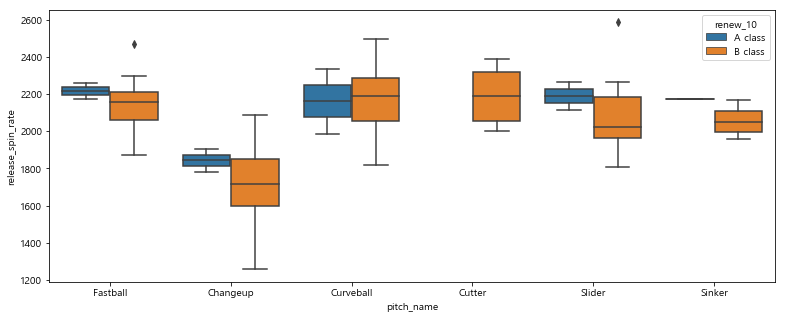

In [17]:
# release_spin_rate는 2015년부터 측정되었기때문에 이전 년도는 제외한다
temp = mlb_stat_1118[(mlb_stat_1118.release_spin_rate.isnull()==False)&(mlb_stat_1118.pitch_name.isin(pitch_names))]

# 결측값을 제외하고 pitch_names
pitch_names = temp.pitch_name.unique()

temp = temp.groupby(['renew_10','pitcher_name','pitch_name']).release_spin_rate.mean().reset_index()
plt.figure(figsize=(13,5))
order_ = ['Fastball','Changeup','Curveball','Cutter','Slider','Sinker']
sns.boxplot(x='pitch_name', y='release_spin_rate', hue='renew_10', order=order_, data=temp)
plt.show()

In [18]:
# 이후 2019년 신규 외국인 선수들의 성적과 비교할때 사용
a_class_spin = temp[temp.renew_10=='A class'].groupby('pitch_name').median()['release_spin_rate'].reset_index()

### 공의 결과 (description)
- A class의 선수가 B class의 선수에 비해 swinging strike blocked, blocked ball과 hit into play의 경우가 더 낮았다. 제구력이 더 좋고 안타를 출루로 이어지는 상황이 B class에 비해 더 낮다고 볼 수 있다. 
- 반면에 swinging strike의 경우 B class에 비해 더 높은 편에 속한다.

In [19]:
# pitcher_info에 투수별 게임 수를 join한다.
temp = mlb_stat_1118.groupby('pitcher_name')['game_date'].count().reset_index()
pitcher_info = pd.merge(pitcher_info, temp, on='pitcher_name', how='inner')

In [20]:
# pitcher_info에 description levels를 변수로 추가한다.
for level in mlb_stat_1118.description.unique():
    pitcher_info.loc[:,level] = 0

# pitcher 마다 각 결과의 횟수를 count하고, 선수별 비교를 위해 결과의 횟수를 게임 수로 나누어준다.
for pitcher in pitcher_info.pitcher_name.unique():
    results = mlb_stat_1118.loc[mlb_stat_1118.pitcher_name==pitcher,'description'].value_counts()
    for result in results.index:
        pitcher_games = pitcher_info[pitcher_info.pitcher_name==pitcher].game_date
        pitcher_info.loc[pitcher_info.pitcher_name==pitcher,result] = results.loc[result] / pitcher_games

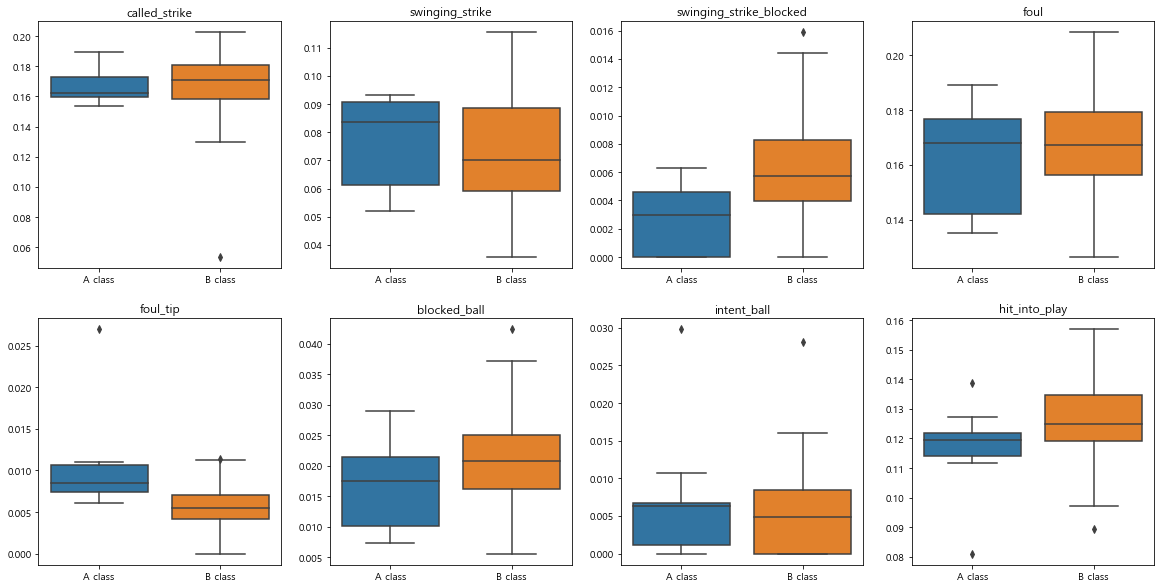

In [21]:
f, ax = plt.subplots(2,4, figsize=(20,10))
results = ['called_strike','swinging_strike','swinging_strike_blocked','foul',
           'foul_tip','blocked_ball','intent_ball','hit_into_play']
for i in range(2*4):
    sns.boxplot(x='renew_10',y=results[i], data=pitcher_info, ax=ax[i//4,i%4])
    ax[i//4,i%4].set_title(results[i])
    ax[i//4,i%4].set_xlabel('')
    ax[i//4,i%4].set_ylabel('')
plt.show()

### 볼카운트 별 구종

- A class의 경우 B class에 비해 변화구를 더 잘 활용한다. 2 strike 상황에서 Fastball보다는 Changeup이나 Curveball을 더 선호한다.

In [22]:
mlb_stat_1118.loc[:,'ball_count'] = mlb_stat_1118[['balls','strikes']].apply(lambda x: '{} ball, {} strike'.format(x.balls,x.strikes), axis=1)

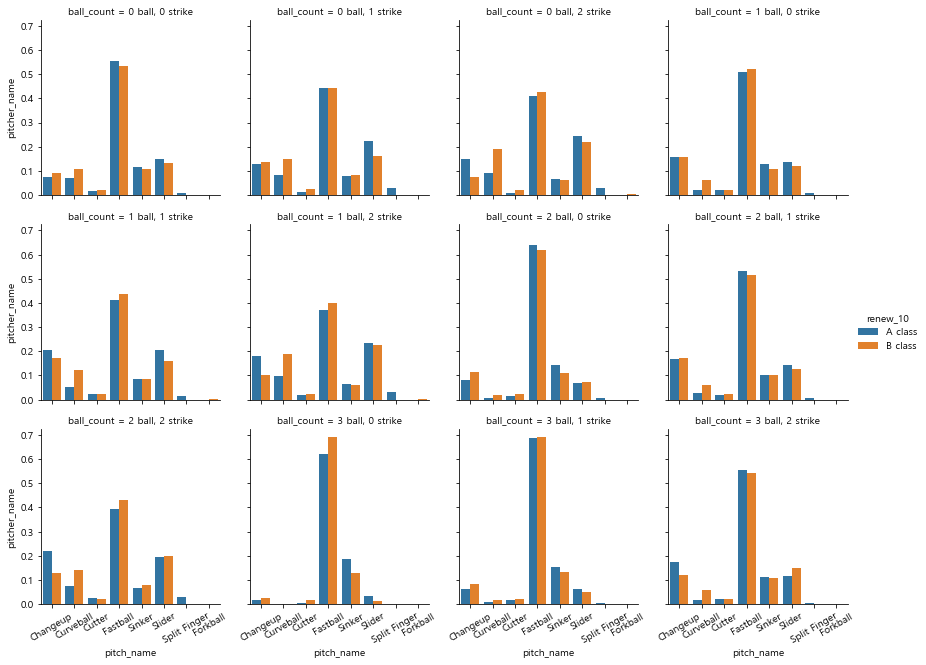

In [23]:
pitch_names = ['Fastball', 'Changeup', 'Curveball', 'Cutter', 'Slider', 'Forkball', 'Sinker', 'Split Finger']
temp = mlb_stat_1118.groupby(['renew_10','ball_count','pitch_name'])['pitcher_name'].count().reset_index()
temp = temp[temp.pitch_name.isin(pitch_names)]

# 재계약 선수와 아닌 선수의 수가 다르기때문에 비교를 위해 비율로 계산한다.
divide_temp = mlb_stat_1118.groupby(['renew_10','ball_count'])['pitcher_name'].count().reset_index()
for renew_10_level in divide_temp.renew_10.unique():
    for ball_count_level in divide_temp.ball_count.unique():
        new_values = temp.loc[(temp.renew_10==renew_10_level)&(temp.ball_count==ball_count_level),'pitcher_name'] / divide_temp.loc[(divide_temp.renew_10==renew_10_level)&(divide_temp.ball_count==ball_count_level),'pitcher_name'].iloc[0]
        temp.loc[(temp.renew_10==renew_10_level)&(temp.ball_count==ball_count_level),'pitcher_name'] = new_values

g = sns.catplot(x='pitch_name', y='pitcher_name', 
                hue='renew_10', col='ball_count', col_wrap=4, height=3,
                data=temp, kind='bar')
g.set_xticklabels(rotation=30)

In [24]:
# 2019 외국인 선수 성적과 비교하기 위해 사용한다.
ball_cnt_1118 = temp[temp.ball_count.apply(lambda x: True if '2 strike' in x else False)]

## 2019 외국인 선수들의 MLB 데이터

### 점수(Score)
- 2011~2018년 KBO에서 활약한 외국인 선수들의 MLB 데이터를 기준으로 좋은 성적 또는 수치는 나타내는 선수에게 **점수(score)**를 매긴다.

In [25]:
new_pitcher_info = mlb_stat_19.groupby('pitcher_name')['game_date'].count().reset_index()
new_pitcher_info.loc[:,'score'] = 0

### 나이
- 2019년 신규 외국인 선수들의 나이는 25~31세로 A class 선수가 속한 나이대와 거의 같다. 

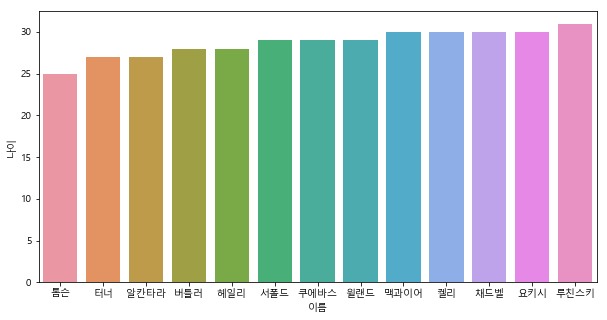

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x='이름', y='나이', data=mlb_19_age.sort_values(by='나이'))
plt.show()

### 구종 수, 구종 별 빈도수
- 구종 별 5가지를 소화할 수 있는 선수는 **루친스키, 버틀러, 요키시, 터너** 이다.

In [27]:
# 포심과 투심 패스트볼은 모두 하나의 패스트볼로 통일한다. 
mlb_stat_19.pitch_name = mlb_stat_19.pitch_name.apply(lambda x: 'Fastball' if x in ['4-Seam Fastball', '2-Seam Fastball'] else x )
# nan 값은 Unknown으로 변경한다. 
mlb_stat_19.pitch_name = mlb_stat_19.pitch_name.apply(lambda x: 'Unknown' if str(x) == 'nan' else x )

# 선수별 구종 개수 변수(pitch_cnt)를 생성한다.
new_pitcher_info.loc[:,'pitch_cnt'] = 0

# 선수별 구종을 new_pitcher_info의 변수로 추가한다.
for pitch in mlb_stat_19.pitch_name.unique():
    if pitch in ['Unknown','Pitch Out','Eephus','Intentional Ball']:
        continue
    new_pitcher_info.loc[:,pitch] = 0

# 선수마다 구사하는 구종 개수를 입력한다.
for pitcher in new_pitcher_info.pitcher_name.unique():
    pitch_names = list(mlb_stat_19[mlb_stat_19.pitcher_name==pitcher].pitch_name.unique())
    if 'Unknown' in pitch_names:
        pitch_names.remove('Unknown')
    if 'Pitch Out' in pitch_names:
        # Pitch Out은 구종이라기보다 고의로 볼을 내는 것이기때문에 제외한다.
        pitch_names.remove('Pitch Out')
    if 'Eephus' in pitch_names:
        # Eephus는 구종 중 하나이긴 하지만 흔치않은 구종이고 사실상 전략에 중요한 요소는 아니기 때문에 제외한다.
        pitch_names.remove('Eephus')
    if 'Intentional Ball' in pitch_names:
        # Intentional Ball은 고의 4구이기 때문에 제외한다.
        pitch_names.remove('Intentional Ball')
    
    new_pitcher_info.loc[new_pitcher_info.pitcher_name==pitcher, 'pitch_cnt'] = len(pitch_names)
    
    # 각 선수가 사용하는 구종을 new_pitcher_info에 count한다.
    for pitch_name in pitch_names:
        new_pitcher_info.loc[new_pitcher_info.pitcher_name==pitcher, pitch_name] = 1

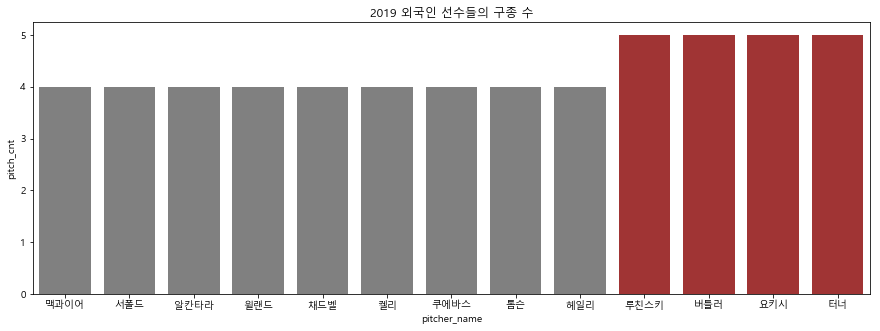

In [28]:
plt.figure(figsize=(15,5))
colors = ['gray']*9 + ['firebrick']*4
sns.barplot(x='pitcher_name', y='pitch_cnt', data=new_pitcher_info.sort_values(by='pitch_cnt'), palette=colors)
plt.title('2019 외국인 선수들의 구종 수')
plt.show()

# 다룰 수 있는 구종이 다른선수에 비해 많은 네명의 선수에세 + 1 점을 해준다.
for pitcher in ['루친스키','버틀러','요키시','터너']:
    new_pitcher_info.loc[new_pitcher_info.pitcher_name==pitcher, 'score'] += 1

### 구종 별 구속
- 2011~2018년 KBO에서 활약한 외국인 투수들의 MLB 성적을 기준으로 더 좋은 구속을 가진 선수를 강조하였다. 각 구종별 기존 KBO 외국인 투수보다 좋은 구속을 가진 선수에게 점수는 더한다.

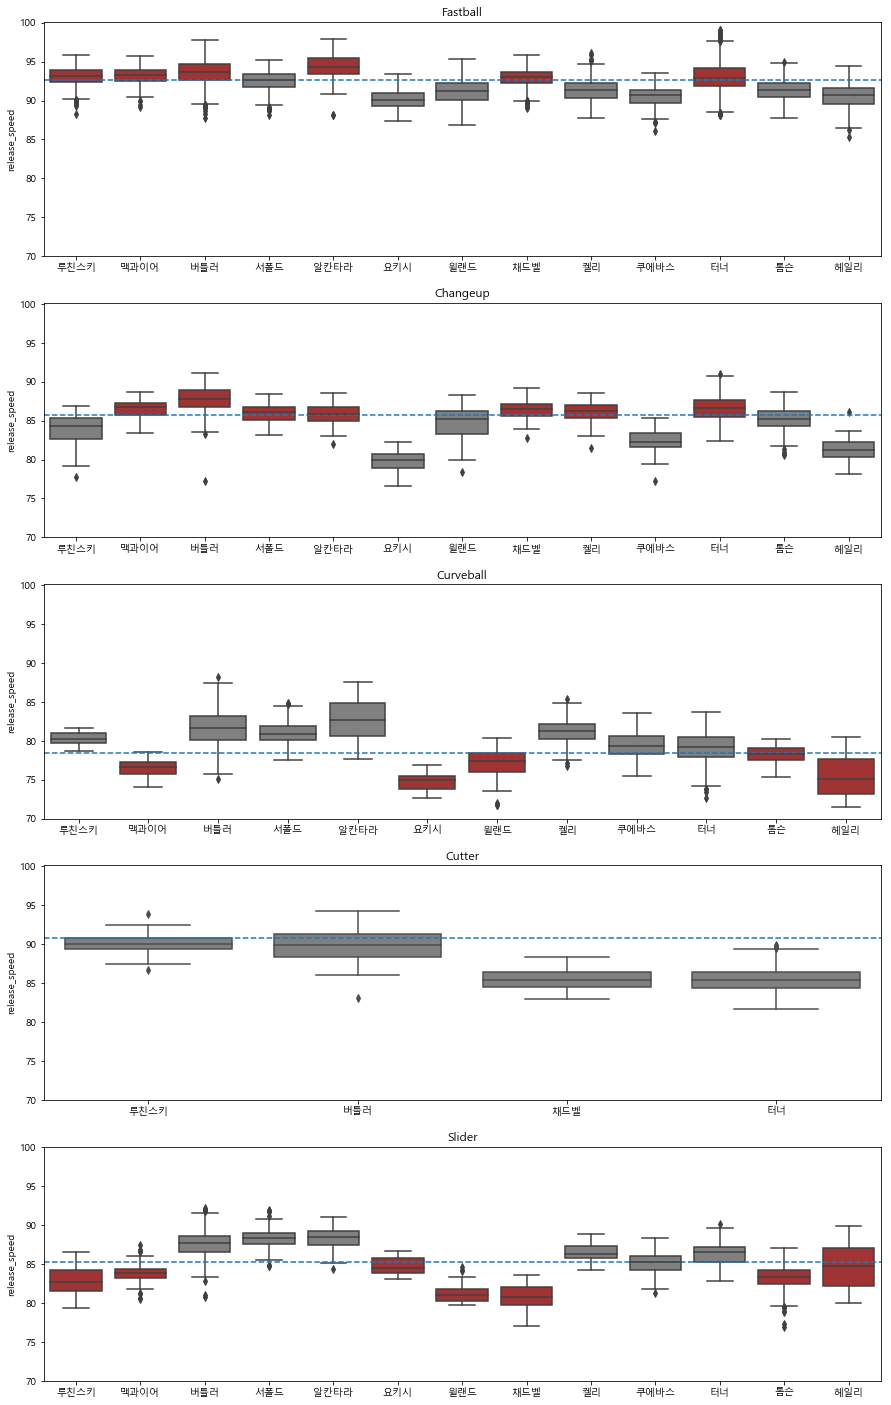

In [29]:
pitch_names = ['Fastball', 'Changeup', 'Curveball', 'Cutter', 'Slider']
f, ax = plt.subplots(len(pitch_names),1, figsize=(15,25))
for i in range(len(pitch_names)):
    # 2019년 외국인 투수들의 성적의 중앙값과 2011~2018년 외국인 선수들의 성적을 비교하여 더 우수한 선수에게 색을 강조한다.
    flag_score = a_class_speed.loc[a_class_speed.pitch_name==pitch_names[i],'release_speed'].iloc[0]
    temp = mlb_stat_19[mlb_stat_19.pitch_name==pitch_names[i]].sort_values(by='pitcher_name')
    median_score = temp.groupby('pitcher_name').median()['release_speed']
    if pitch_names[i] in ['Curveball','Slider']:
        colors = ['firebrick' if x < flag_score else 'gray' for x in median_score]
        nice_pitcher = [True if x < flag_score else False for x in median_score]
    else:
        colors = ['firebrick' if x > flag_score else 'gray' for x in median_score]
        nice_pitcher = [True if x > flag_score else False for x in median_score]
        
    # boxplot
    sns.boxplot(x='pitcher_name', y='release_speed', data=temp, palette=colors, ax=ax[i])
    ax[i].set_title(pitch_names[i])
    ax[i].set_xlabel('')
    ax[i].axhline(flag_score, ls='--')
    ax[i].set_ylim([70, max(mlb_stat_19.release_speed)+1])
    
    # 2011~2018 외국인 선수보다 좋은 성적의 선수에게 + 1 점
    for pitcher in median_score.loc[nice_pitcher].index:
        new_pitcher_info.loc[new_pitcher_info.pitcher_name==pitcher,'score'] += 1

### 구종 별 공의 회전율
- 2011~2018년 KBO에서 활약한 외국인 투수들 중 A class에 속하는 선수들의 MLB 성적을 기준으로  더 좋은 회전율을 가진 선수를 강조하였다. 각 구종별 기존 KBO 외국인 투수보다 좋은 회전율을 가진 선수에게 점수는 더한다.

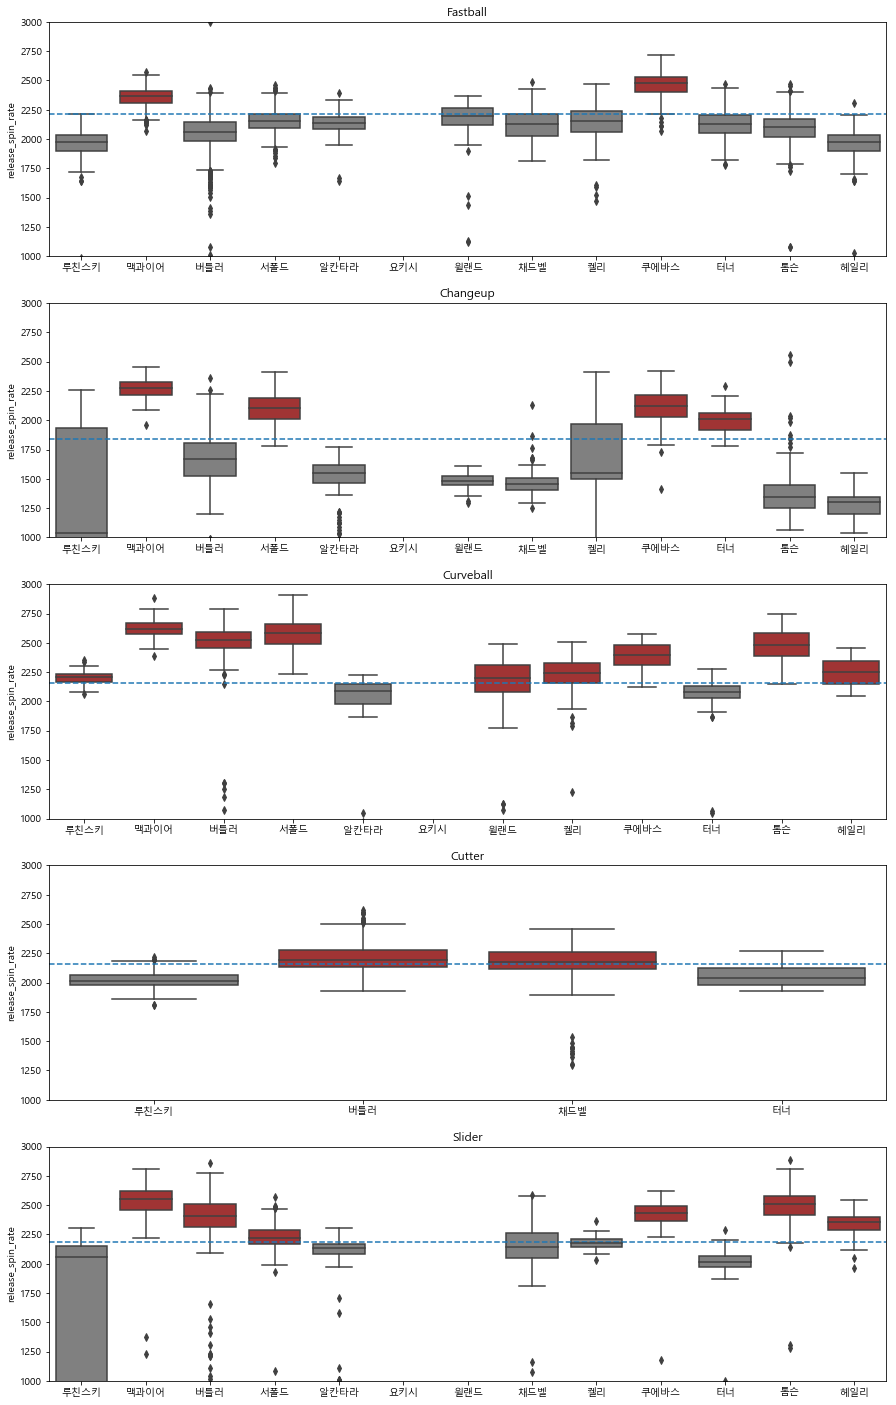

In [30]:
pitch_names = ['Fastball', 'Changeup', 'Curveball', 'Cutter', 'Slider']
f, ax = plt.subplots(len(pitch_names),1, figsize=(15,25))
for i in range(len(pitch_names)):
    # 구종 별 공의 회전율은 2015년부터 기록되었기 때문에 2011~2018 MLB 데이터에서 A class의 선수들에게 기록 되지 않은 구종도 있다.
    if pitch_names[i] in list(a_class_spin.pitch_name):
        flag_score = a_class_spin.loc[a_class_spin.pitch_name==pitch_names[i],'release_spin_rate'].iloc[0]
    # 2019년 외국인 투수들의 성적의 중앙값과 2011~2018년 외국인 선수들의 성적을 비교하여 더 우수한 선수에게 색을 강조한다.
    temp = mlb_stat_19[mlb_stat_19.pitch_name==pitch_names[i]].sort_values(by='pitcher_name')
    median_score = temp.groupby('pitcher_name').median()['release_spin_rate']
    colors = ['firebrick' if x > flag_score else 'gray' for x in median_score]
    nice_pitcher = [True if x > flag_score else False for x in median_score]
    
    # boxplot
    sns.boxplot(x='pitcher_name', y='release_spin_rate', data=temp, palette=colors, ax=ax[i])
    ax[i].set_title(pitch_names[i])
    ax[i].set_xlabel('')
    ax[i].axhline(flag_score, ls='--')
    ax[i].set_ylim([1000,3000])
    
    # 2011~2018 외국인 선수보다 좋은 성적의 선수에게 + 1 점
    for pitcher in median_score.loc[nice_pitcher].index:
        new_pitcher_info.loc[new_pitcher_info.pitcher_name==pitcher,'score'] += 1

### 공의 결과
- 2011~2018년 KBO에서 활약한 외국인 투수 중 A class에 속하는 선수들의 MLB 성적을 기준으로 더 좋은 성적을 가진 선수들을 강조하였다. 각 결과별 A class에 속한 선수보다 좋은 성적을 나타내는 선수에게 점수를 더한다.

In [31]:
# new_pitcher_info에 description levels를 변수로 추가한다.
for level in mlb_stat_19.description.unique():
    new_pitcher_info.loc[:,level] = 0

# pitcher 마다 각 결과의 횟수를 count하고, 선수별 비교를 위해 결과의 횟수를 게임 수로 나누어준다.
for pitcher in new_pitcher_info.pitcher_name.unique():
    results = mlb_stat_19.loc[mlb_stat_19.pitcher_name==pitcher,'description'].value_counts()
    for result in results.index:
        pitcher_games = new_pitcher_info[new_pitcher_info.pitcher_name==pitcher].game_date
        new_pitcher_info.loc[new_pitcher_info.pitcher_name==pitcher,result] = results.loc[result] / pitcher_games

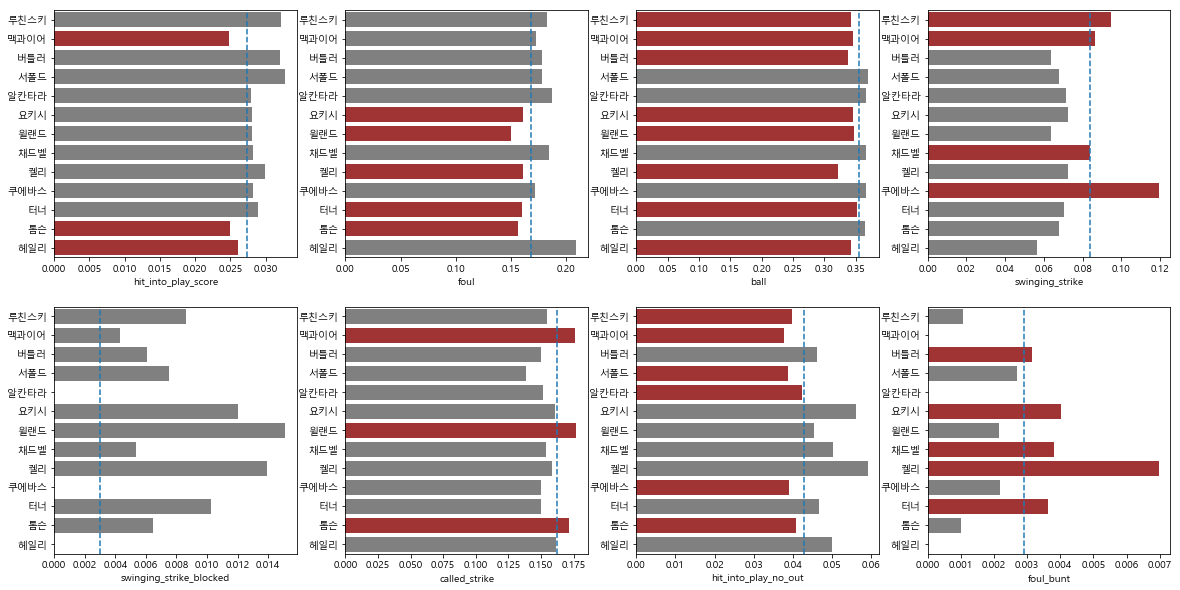

In [32]:
f, ax = plt.subplots(2,4, figsize=(20,10))
descriptions = mlb_stat_19.description.unique()
for i in range(2*4):
    # 2019년 외국인 투수들의 성적의 중앙값과 2011~2018년 외국인 선수들의 성적을 비교하여 더 우수한 선수에게 색을 강조한다.
    flag_score = pitcher_info.groupby('renew_10')[descriptions[i]].median().loc['A class']
    new_pitcher_info = new_pitcher_info.sort_values(by='pitcher_name')    
    rate_19 = new_pitcher_info[descriptions[i]]      
    if descriptions[i] in ['hit_into_play_score','foul','ball','hit_into_play_no_out','swinging_strike_blocked']:
        colors = ['firebrick' if x < flag_score else 'gray' for x in rate_19]
        nice_pitcher = [True if x < flag_score else False for x in rate_19]
    else:
        colors = ['firebrick' if x > flag_score else 'gray' for x in rate_19]
        nice_pitcher = [True if x > flag_score else False for x in rate_19]
    
    # barplot
    sns.barplot(x=descriptions[i], y='pitcher_name', data=new_pitcher_info, palette=colors, ax=ax[i//4,i%4])
    ax[i//4,i%4].set_ylabel('')
    ax[i//4,i%4].axvline(flag_score, ls='--')
    
    # 2011~2018 외국인 선수보다 좋은 성적의 선수에게 + 1 점
    for pitcher in median_score.loc[nice_pitcher].index:
        new_pitcher_info.loc[new_pitcher_info.pitcher_name==pitcher,'score'] += 1

### 볼카운트 별 구종
- 2011~2018 KBO에서 활약한 선수들의 MLB 기록을 보면 A class의 속하는 선수들의 경우 2 strike 상황에서 B class 선수들에 비해 직구 이외에 더 다양한 구종을 구사하였다. 2019년 외국인 투수들의 MLB 성적에서 2 strick 상황에서 직구 이외에 가장 많이 사용되는 changeup과 slider를 비교하여 A class에 속하는 선수들보다 좋은 성적은 가진 선수들에게 점수를 더한다.

In [33]:
mlb_stat_19.loc[:,'ball_count'] = mlb_stat_19[['balls','strikes']].apply(lambda x: '{} ball, {} strike'.format(x.balls,x.strikes), axis=1)

In [34]:
pitch_names = ['Fastball', 'Changeup', 'Curveball', 'Cutter', 'Slider', 'Sinker']
temp = mlb_stat_19.groupby(['pitcher_name','ball_count','pitch_name'])['game_date'].count().reset_index()
temp = temp[temp.pitch_name.isin(pitch_names)]

# 재계약 선수와 아닌 선수의 수가 다르기때문에 비교를 위해 비율로 계산한다.
divide_temp = mlb_stat_19.groupby(['pitcher_name','ball_count'])['game_date'].count().reset_index()
for pitcher_name_level in divide_temp.pitcher_name.unique():
    for ball_count_level in divide_temp.ball_count.unique():
        new_values = temp.loc[(temp.pitcher_name==pitcher_name_level)&(temp.ball_count==ball_count_level),'game_date'] / divide_temp.loc[(divide_temp.pitcher_name==pitcher_name_level)&(divide_temp.ball_count==ball_count_level),'game_date'].iloc[0]
        temp.loc[(temp.pitcher_name==pitcher_name_level)&(temp.ball_count==ball_count_level),'game_date'] = new_values

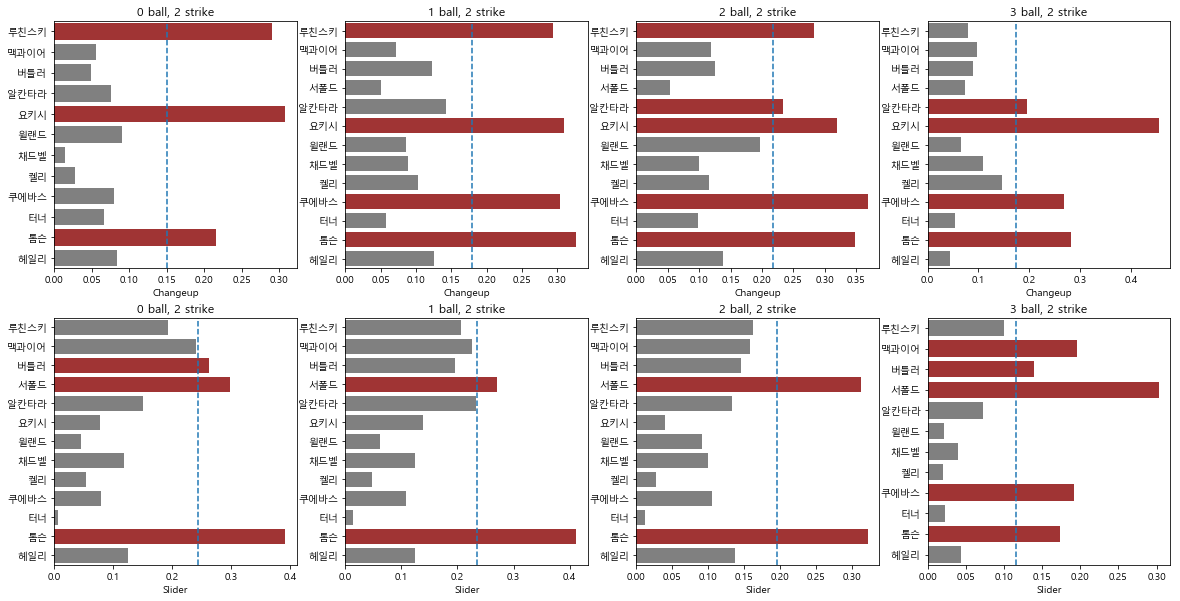

In [35]:
# 2 strike 볼카운트 상황에서 투수가 구사한 구종을 비교한다.
temp = temp[temp.ball_count.apply(lambda x: True if '2 strike' in x else False)]

ball_counts = temp.ball_count.unique()
# A class 선수의 경우 2 strike 볼카운트의 경우 changeup이나 slider를 B class에 비해서 더 많이 사용하는 편이다.
pitch_names = ['Changeup','Slider'] 

f, ax = plt.subplots(2,4,figsize=(20,10))
for i in range(2*4):
    flag_score = ball_cnt_1118[(ball_cnt_1118.pitch_name==pitch_names[i//4])&(ball_cnt_1118.ball_count==ball_counts[i%4])&(ball_cnt_1118.renew_10=='A class')].pitcher_name.iloc[0]
    figure_data = temp[(temp.pitch_name==pitch_names[i//4])&(temp.ball_count==ball_counts[i%4])]
    colors = ['firebrick' if x > flag_score else 'gray' for x in figure_data.game_date]
    nice_pitcher = [True if x > flag_score else False for x in figure_data.game_date]
    
    sns.barplot(x='game_date', y='pitcher_name', data=figure_data, palette=colors, ax=ax[i//4,i%4])
    ax[i//4,i%4].set_xlabel(pitch_names[i//4])
    ax[i//4,i%4].set_title(ball_counts[i%4])
    ax[i//4,i%4].set_ylabel('')
    ax[i//4,i%4].axvline(flag_score, ls='--')

    # 2011~2018 외국인 선수보다 좋은 성적의 선수에게 + 1 점
    for pitcher in median_score.loc[nice_pitcher].index:
        new_pitcher_info.loc[new_pitcher_info.pitcher_name==pitcher,'score'] += 1

# Final Score

- Score의 기준은 A class를 선수들의 성적을 기준으로 더 나은 성적을 가진 선수에게 점수를 더하는 것이였고, A class보다 좋은 성적이라는 것은 **KBO에 들어와서 첫 시즌 10승을 이루고 2년차 입단계약을 성사할 수 있는 가능성이 크다고 볼 수 있다.**
- 최종 점수의 결과 맥과이어와 톰슨이 14점으로 공동 1등하였고, 루친스키,버틀러,쿠에바스가 10점으로 공동 2등하였다. 
- 이번 과제의 최종 목표는 2019년 새롭게 들어온 외국인 투수 중 2명을 스카우팅하는 것이기 때문에 **맥과이어**와 **톰슨**을 영입한다.
    - 맥과이어는 나이는 29살로 4가지 구종을 구사할 수 있고 다른 선수들에 비해 구속과 공의 회전율이 월등하게 우수하고. 스트라이크 유도를 잘하는 편이며 제구력이 좋다.
    - 톰슨의 경우 25살로 이번해 새롭게 영입된 외국인 투수 중 가장 나이가 어리다. 4가지 구종을 구사할 수 있고, 커브볼과 슬라이더에 아주 강한 면모를 보인다.
    



In [36]:
new_pitcher_info[['pitcher_name','score']].sort_values(by='score',ascending=False)

,pitcher_name,score
1,맥과이어,14
11,톰슨,14
0,루친스키,10
2,버틀러,10
9,쿠에바스,10
3,서폴드,9
5,요키시,9
10,터너,9
4,알칸타라,7
12,헤일리,7


# 맥과이어와 톰슨은 KBO와 함께 갑시다.
![final pitcher](https://github.com/bllfpc/dacon/blob/master/cpt7/images/%EC%B5%9C%EC%A2%85.JPG)